## Machine Learning Project 2
### Jules Choquart & Tyler Maule // February 10th, 2019

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#reading data, originally downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/
carsdata = pd.read_csv('imports-85.data',header=None)  

#renaming column headers appropriately 
cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
carsdata.columns = cols

#dropping two columns that are specific to this dataset (i.e. won't produce a generalizable model)
carsdata.drop(columns = ['normalized-losses'],inplace=True)
carsdata.drop(columns = ['symboling'],inplace=True)

#coercing columns w/ data that should be numeric to numeric
carsdata.price = pd.to_numeric((carsdata['price']), errors='coerce')
carsdata['horsepower'] = pd.to_numeric((carsdata['horsepower']), errors='coerce')
carsdata['peak-rpm'] = pd.to_numeric((carsdata['peak-rpm']), errors='coerce')
carsdata['stroke'] = pd.to_numeric((carsdata['stroke']), errors='coerce')
carsdata['bore'] = pd.to_numeric((carsdata['bore']), errors='coerce')

carsdata.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
#dropping rows w/ undetermined categorical variables (for a large study, we might predict these values based on other predictors)
carsdata = carsdata[carsdata['make'] != '?']
carsdata = carsdata[carsdata['body-style'] != '?']
carsdata = carsdata[carsdata['fuel-system'] != '?']

carsdata.head()  

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
#confirming datatypes
carsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 24 columns):
make                205 non-null object
fuel-type           205 non-null object
aspiration          205 non-null object
num-of-doors        205 non-null object
body-style          205 non-null object
drive-wheels        205 non-null object
engine-location     205 non-null object
wheel-base          205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curb-weight         205 non-null int64
engine-type         205 non-null object
num-of-cylinders    205 non-null object
engine-size         205 non-null int64
fuel-system         205 non-null object
bore                201 non-null float64
stroke              201 non-null float64
compression-rate    205 non-null float64
horsepower          203 non-null float64
peak-rpm            203 non-null float64
city-mpg            205 non-null int64
highway-m

In [5]:
#viewing descriptions of each quantitative predictor (after [-0,1] scaling)
carsdata.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


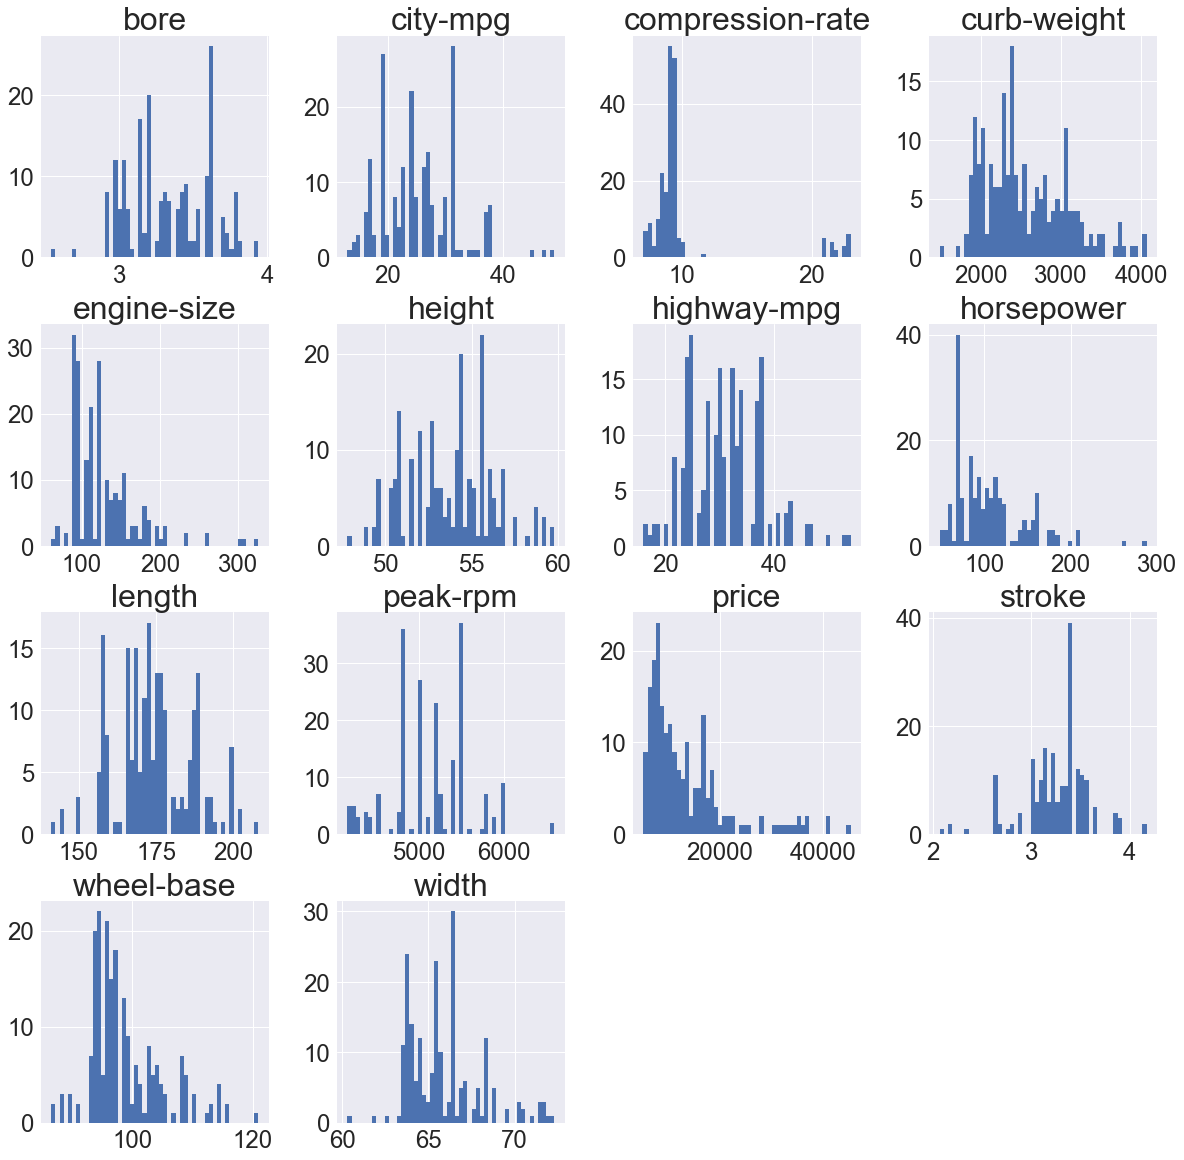

In [6]:
#adjust text size
import matplotlib
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)

#plotting historgrams of all quantitative variables
%matplotlib inline
carsdata.hist(bins=50, figsize=(20,20))
plt.show()

In [7]:
#correlation matrix of all quantitative variables
corr_matrix = carsdata.corr()
corr_matrix

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310
compression-rate,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005203,0.186170,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107
horsepower,0.352297,0.555003,0.642482,-0.110711,0.751034,0.810773,0.577273,0.090254,-0.205874,1.000000,0.130971,-0.803620,-0.770908,0.810533


In [8]:
#sorting quantitative predictors by correlation with price
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
engine-size         0.872335
curb-weight         0.834415
horsepower          0.810533
width               0.751265
length              0.690628
wheel-base          0.584642
bore                0.543436
height              0.135486
stroke              0.082310
compression-rate    0.071107
peak-rpm           -0.101649
city-mpg           -0.686571
highway-mpg        -0.704692
Name: price, dtype: float64

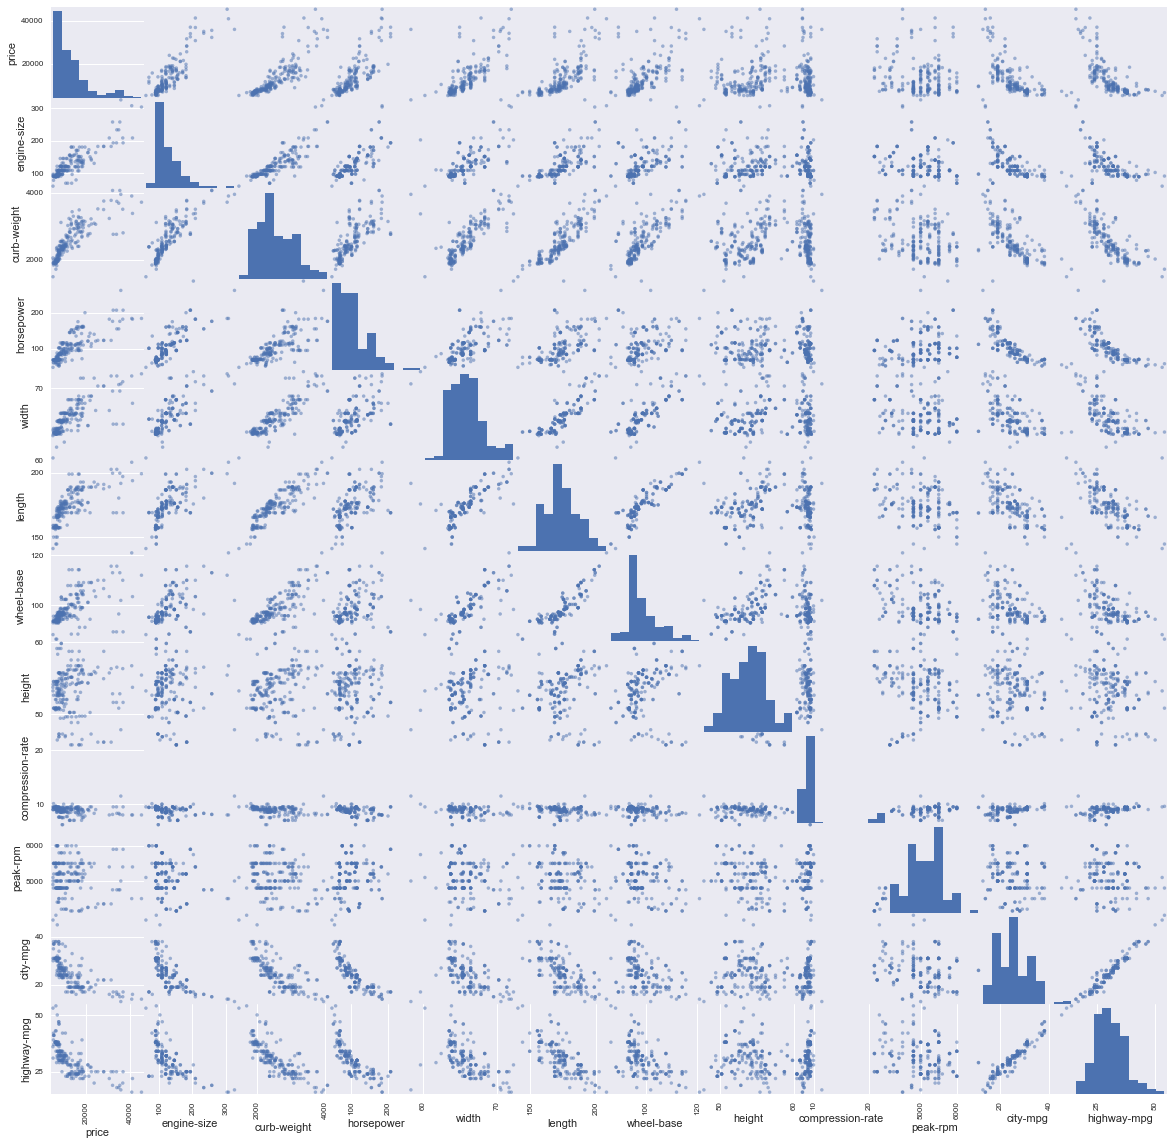

In [9]:
#plotting the correlation matrix of price and other quantitative variables
from pandas.plotting import scatter_matrix

attributes = ["price","engine-size","curb-weight","horsepower","width","length","wheel-base","height","compression-rate","peak-rpm","city-mpg","highway-mpg"]
scatter_matrix(carsdata[attributes], figsize=(20,20))
plt.show()

In [10]:
#creating dummy variables based on categorical variables
carsdata = pd.get_dummies(carsdata)
list(carsdata.columns)

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'make_alfa-romero',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel-type_diesel',
 'fuel-type_gas',
 'aspiration_std',
 'aspiration_turbo',
 'num-of-doors_?',
 'num-of-doors_four',
 'num-of-doors_two',
 'body-style_convertible',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'drive-wheels_4wd',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_front',
 'engine-location_rear',
 'engine-type_dohc',
 'engine-type_dohcv',
 'engine-type_l',
 'engine-typ

In [11]:
#number of predictors
len(list(carsdata.columns))

75

In [12]:
#imputing NaN values with medians, for quantitative predictors
carsdata = carsdata.apply(lambda x: x.fillna(x.median()),axis=0)
(carsdata).head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

#scaling values in numeric columns, normalized in range [0,1]
for val in ["price",'bore','stroke',"engine-size","curb-weight","horsepower","width","length","wheel-base","height","compression-rate","peak-rpm","city-mpg","highway-mpg"]:
    print(val)
    x_scaled = min_max_scaler.fit_transform(carsdata[val].values.reshape(-1,1))
    carsdata[val] =  x_scaled
    
carsdata.head()

price
bore
stroke
engine-size
curb-weight
horsepower
width
length
wheel-base
height
compression-rate
peak-rpm
city-mpg
highway-mpg


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0,0,0,0,0,0,0,1,0,0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0,0,0,0,0,0,0,1,0,0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,...,0,0,0,0,0,0,0,1,0,0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,...,0,0,0,0,0,0,0,1,0,0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# setting random seed to ensure reproducibility
np.random.seed(42)

In [15]:
from sklearn.model_selection import train_test_split

#splitting data into training, testing sets
train_set, test_set = train_test_split(carsdata, test_size=0.2, random_state=42)

#splitting training set into labels, other data
train_set_Y = train_set.price
train_set_X = train_set.drop(columns='price')


In [16]:
test_set.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
15,0.492711,0.714925,0.550000,0.658333,0.675718,0.558491,0.771429,0.628571,0.062500,0.558333,...,0,0,0,0,0,0,0,1,0,0
9,0.376093,0.553731,0.633333,0.350000,0.607060,0.264151,0.421429,0.633333,0.000000,0.466667,...,0,0,0,0,0,0,0,1,0,0
100,0.309038,0.482090,0.408333,0.575000,0.315749,0.222642,0.564286,0.666667,0.093750,0.204167,...,0,0,0,1,0,0,0,0,0,0
132,0.364431,0.679104,0.516667,0.691667,0.453840,0.226415,0.714286,0.476190,0.144375,0.258333,...,0,0,0,0,0,0,0,1,0,0
68,0.682216,0.743284,0.833333,0.908333,0.877424,0.460377,0.742857,0.747619,0.906250,0.312500,...,0,0,0,0,0,1,0,0,0,0


In [17]:
from sklearn.linear_model import LinearRegression

#fitting a linear regression model with all training data (no cross-validation yet)
lin_reg = LinearRegression()
lin_reg.fit(train_set_X, train_set_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
from sklearn.metrics import mean_squared_error

#predicting prices based on training data (again, no cross-validation yet)
car_predictions = lin_reg.predict(train_set_X)

#finding root MSE of our linear regression model
lin_mse = mean_squared_error(train_set_Y, car_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.04282330388566852

In [19]:
from sklearn.metrics import mean_absolute_error

#finding mean absolute error of our linear regression model
lin_mae = mean_absolute_error(train_set_Y, car_predictions)
lin_mae

0.03375553735976533

In [20]:
from sklearn.tree import DecisionTreeRegressor

#predicitng prices based on training data with a decision tree regressor (again, no cross-validation yet)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set_X, train_set_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [21]:
#RMSE of the decision tree
cars_predictions = tree_reg.predict(train_set_X)
tree_mse = mean_squared_error(train_set_Y, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.00703438595412469

In [22]:
from sklearn.model_selection import cross_val_score

#performing 10-fold cross validation with the decision tree regression model
scores = cross_val_score(tree_reg, train_set_X, train_set_Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [23]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#viewing scores for the decision tree model with cross-validation
display_scores(tree_rmse_scores)

Scores: [0.05419806 0.08360951 0.05970185 0.03192092 0.12033439 0.10054516
 0.16797556 0.06159017 0.23073721 0.09038637]
Mean: 0.10009992056066394
Standard deviation: 0.05685022895303267


In [24]:
#viewing scores for the linear regression model with cross-validation
lin_scores = cross_val_score(lin_reg, train_set_X, train_set_Y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [7.85566153e+10 2.15119031e+11 2.76831292e+10 4.37236737e-02
 1.76665356e+11 1.34395584e+11 1.31748970e+11 1.07028168e-01
 6.66264892e+11 8.76088686e-02]
Mean: 143043357852.2739
Standard deviation: 189509680973.94907


In [25]:
#second decision tree
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=8, max_features=40)
tree_reg2.fit(train_set_X, train_set_Y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=40,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [26]:
scores = cross_val_score(tree_reg2, train_set_X, train_set_Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.061425   0.04772297 0.04534448 0.04571764 0.07516628 0.06477747
 0.07146851 0.05985674 0.22084238 0.09563865]
Mean: 0.07879601341995685
Standard deviation: 0.04956147483946931


In [27]:
from sklearn.ensemble import RandomForestRegressor

#instantiating and training a random forest model with all training data
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(train_set_X, train_set_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
#finding RMSE error w/ random forest regressor and all training data
car_predictions = forest_reg.predict(train_set_X)
forest_mse = mean_squared_error(train_set_Y, car_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.031025875607086247

In [29]:
from sklearn.model_selection import GridSearchCV

#using grid search to find the best hyperparameters for our decision tree model
param_grid = [
    # try 45 (5×9) combinations of hyperparameters
    {'n_estimators': [3, 10, 30,50,70], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 50]},
    # then try 18 (3×6) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30,50,70], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 50]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (63)*5=315 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_X, train_set_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 50]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2, 4, 6, 8, 10, 15, 20, 25, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
#view the best parameters according to grid search
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 10}

In [31]:
#view the best estimator object
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [32]:
#get test scores for all grid-search models
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.09615804259821939 {'max_features': 2, 'n_estimators': 3}
0.08504857483326969 {'max_features': 2, 'n_estimators': 10}
0.08230416731571745 {'max_features': 2, 'n_estimators': 30}
0.08113160530710088 {'max_features': 2, 'n_estimators': 50}
0.07833291989379763 {'max_features': 2, 'n_estimators': 70}
0.09041091635234642 {'max_features': 4, 'n_estimators': 3}
0.08028420246039096 {'max_features': 4, 'n_estimators': 10}
0.07541037667758044 {'max_features': 4, 'n_estimators': 30}
0.0751421240713885 {'max_features': 4, 'n_estimators': 50}
0.07461909238521072 {'max_features': 4, 'n_estimators': 70}
0.07518892678708564 {'max_features': 6, 'n_estimators': 3}
0.06892710834627061 {'max_features': 6, 'n_estimators': 10}
0.0700287930349234 {'max_features': 6, 'n_estimators': 30}
0.07083062274487432 {'max_features': 6, 'n_estimators': 50}
0.07150853380186975 {'max_features': 6, 'n_estimators': 70}
0.07853797050931424 {'max_features': 8, 'n_estimators': 3}
0.0767709726354301 {'max_features': 8, 'n_esti

In [33]:
#dataframe of test results for all grid-search models
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005362,0.000965,-0.009246,-0.002321,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",89,-0.008320,...,-0.007357,-0.001973,-0.014995,-0.000866,-0.013875,-0.002265,0.001085,0.000402,0.004775,0.000900
1,0.011598,0.001058,-0.007233,-0.001482,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",80,-0.003981,...,-0.005406,-0.001385,-0.008218,-0.001795,-0.016852,-0.001447,0.000259,0.000038,0.005154,0.000246
2,0.034318,0.002377,-0.006774,-0.001075,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",77,-0.003828,...,-0.004236,-0.000848,-0.007367,-0.001205,-0.015003,-0.000984,0.001788,0.000558,0.004272,0.000187
3,0.067305,0.004306,-0.006582,-0.000929,NaN,2,50,"{'max_features': 2, 'n_estimators': 50}",74,-0.003473,...,-0.004322,-0.000804,-0.007290,-0.000873,-0.014933,-0.001004,0.011191,0.001809,0.004365,0.000126
4,0.099343,0.006342,-0.006136,-0.000907,NaN,2,70,"{'max_features': 2, 'n_estimators': 70}",63,-0.003135,...,-0.004408,-0.000751,-0.006782,-0.000838,-0.013668,-0.001023,0.010195,0.003410,0.003956,0.000135
5,0.005162,0.000928,-0.008174,-0.001641,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",85,-0.005896,...,-0.003671,-0.002127,-0.008314,-0.000995,-0.019347,-0.001515,0.000484,0.000141,0.005746,0.000384
6,0.013877,0.001212,-0.006446,-0.001254,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",72,-0.003569,...,-0.002210,-0.001160,-0.007946,-0.001519,-0.015840,-0.001004,0.001033,0.000212,0.005041,0.000231
7,0.043433,0.002501,-0.005687,-0.000891,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",44,-0.003975,...,-0.002903,-0.000719,-0.007089,-0.000961,-0.012563,-0.000762,0.007993,0.000734,0.003787,0.000184
8,0.081839,0.003333,-0.005646,-0.000793,NaN,4,50,"{'max_features': 4, 'n_estimators': 50}",39,-0.003678,...,-0.003414,-0.000702,-0.007163,-0.000749,-0.012590,-0.000743,0.011666,0.000227,0.003867,0.000108
9,0.084861,0.003983,-0.005568,-0.000797,NaN,4,70,"{'max_features': 4, 'n_estimators': 70}",35,-0.003593,...,-0.003621,-0.000706,-0.006667,-0.000721,-0.012236,-0.000769,0.007237,0.000387,0.003625,0.000125


In [34]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.33811397e-03, 3.64882784e-02, 5.20723821e-02, 1.16651355e-02,
       1.30132301e-01, 9.81508737e-02, 3.88456253e-02, 2.40303249e-02,
       1.62819509e-02, 1.36362672e-01, 1.17315185e-02, 3.97783631e-02,
       1.09393616e-01, 2.50362789e-04, 2.39141144e-03, 3.62963516e-03,
       1.13679216e-05, 1.36086102e-04, 1.83927163e-04, 1.22634102e-03,
       1.77340638e-02, 3.34615714e-03, 4.32976115e-02, 3.75925441e-05,
       4.13601119e-05, 3.22947563e-04, 5.04966531e-03, 3.90823852e-04,
       1.04040576e-03, 2.02168122e-05, 4.15899002e-03, 1.64370707e-04,
       6.19916875e-04, 2.47757370e-04, 8.92695746e-05, 5.08202066e-04,
       1.71086690e-03, 1.51296311e-03, 2.53075349e-03, 3.19729043e-04,
       8.64167562e-04, 2.01053296e-03, 9.44274452e-03, 4.43150760e-03,
       4.99804151e-04, 1.90376036e-03, 3.87817711e-04, 6.65664876e-04,
       1.36674974e-03, 1.50762374e-02, 1.40992130e-02, 1.70532947e-02,
       9.67320805e-05, 5.03559560e-05, 9.93865400e-04, 4.44762821e-03,
      

In [35]:
#find most important features to the random forest regressor
sorted(zip(feature_importances, train_set_X.columns), reverse=True)

[(0.1363626723353471, 'horsepower'),
 (0.13013230095951442, 'curb-weight'),
 (0.10939361580258858, 'highway-mpg'),
 (0.09815087371653514, 'engine-size'),
 (0.09199309272318976, 'num-of-cylinders_four'),
 (0.05207238207641422, 'width'),
 (0.04329761146789222, 'make_mercedes-benz'),
 (0.039778363056008896, 'city-mpg'),
 (0.03884562533492821, 'bore'),
 (0.03648827842084929, 'length'),
 (0.024030324913844103, 'stroke'),
 (0.017734063828787346, 'make_jaguar'),
 (0.01705329468633316, 'engine-location_rear'),
 (0.016281950872265742, 'compression-rate'),
 (0.01507623744051229, 'drive-wheels_rwd'),
 (0.014099213040433486, 'engine-location_front'),
 (0.011731518450773913, 'peak-rpm'),
 (0.011665135473505076, 'height'),
 (0.010295090885034464, 'fuel-system_2bbl'),
 (0.009442744520880567, 'body-style_convertible'),
 (0.00833811396838831, 'wheel-base'),
 (0.00528942128005521, 'fuel-system_mpfi'),
 (0.005049665313096152, 'make_peugot'),
 (0.005046344400479092, 'engine-type_ohcf'),
 (0.00454799339545

In [36]:
#use the testing set to evaluate our final random forest regression model
final_model = grid_search.best_estimator_

X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [37]:
final_rmse

0.08318268981924547